In [1]:
import duckdb
import pandas as pd
from datasets import load_dataset
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [2]:
tulu_sft_data = load_dataset(
    "rl-research/dr-tulu-sft-data", split="train"
)
openscholar_data = load_dataset(
    "allenai/openscilm_queries", split="train"
)

In [3]:
con = duckdb.connect()
con.register("tulu_sft", tulu_sft_data.data.table)
con.register("openscholar", openscholar_data.data.table)

In [4]:
openscholar_prompts = con.sql(
    "SELECT question FROM tulu_sft WHERE source = 'openscholar'"
).df()["question"].tolist()

## In the original OpenScholar dataset, here's the distribution of subjects

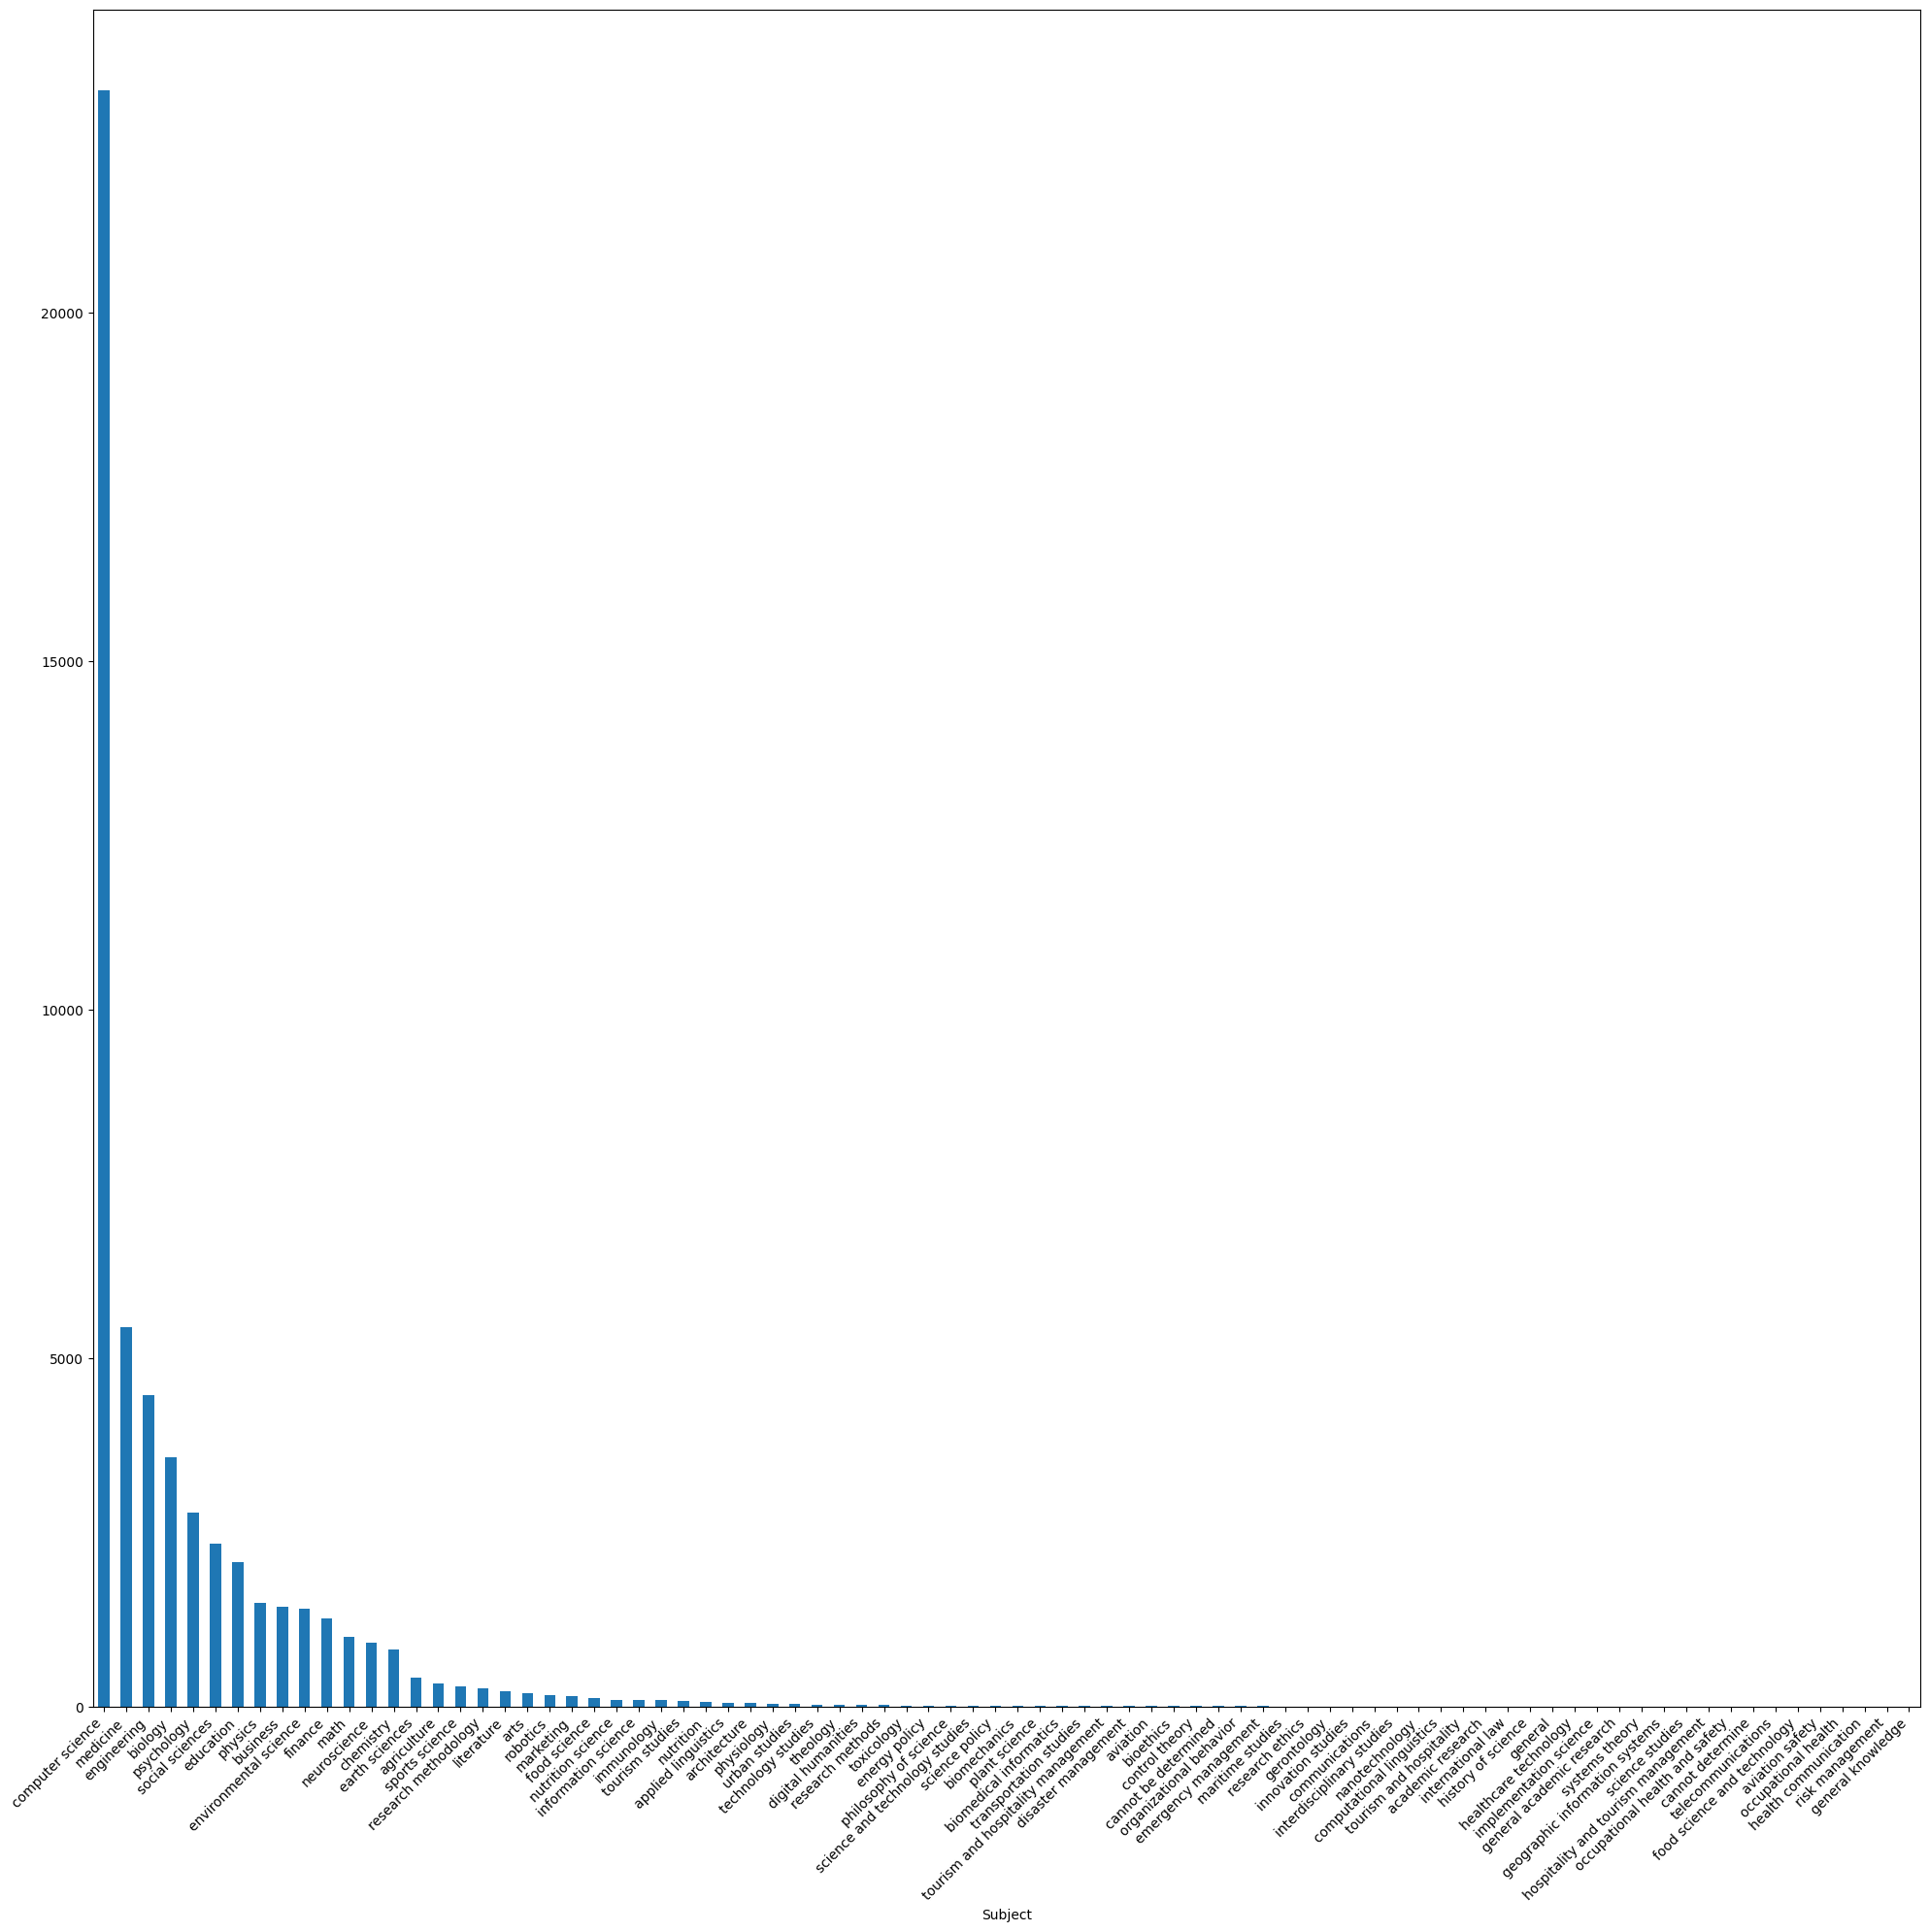

In [5]:
openscholar_table = con.sql("SELECT * FROM openscholar").df()
openscholar_table["Subject"].value_counts().iloc[:82].plot(kind="bar", figsize=(20, 20))
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

## In the original OpenScholar dataset, here's the distribution of Query Intents

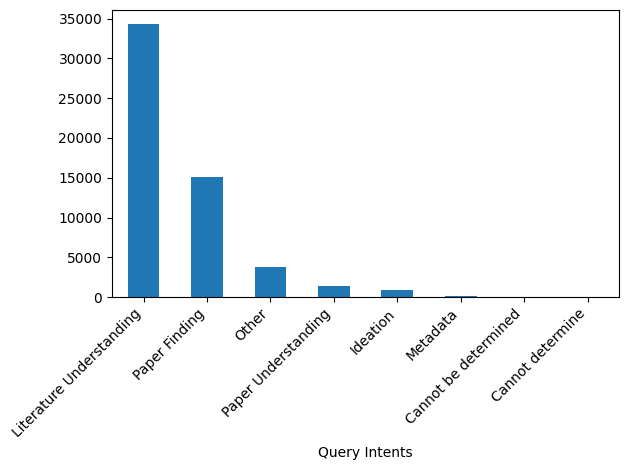

In [6]:
openscholar_table = con.sql("SELECT * FROM openscholar").df()
openscholar_table["Query Intents"].value_counts().iloc[:82].plot(kind="bar")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

In [8]:
df = None
for prompt in tqdm(openscholar_prompts):
    if df is None:
        df = con.execute("SELECT * FROM openscholar WHERE \"Query\" = ?", [prompt]).df()
    else:
        df = pd.concat([df, con.execute("SELECT * FROM openscholar WHERE \"Query\" = ?", [prompt]).df()])
df.reset_index(drop=True)

  0%|          | 0/5704 [00:00<?, ?it/s]

,query,Query Intents,Subject
0,Has microwave-assisted fermentation of feather...,Literature Understanding,biology
1,"""Please provide a detailed overview of theorie...",Literature Understanding,education
2,What recent research explores AI-human symbios...,Paper Finding,computer science
3,give a comprehensive review on the effect of l...,Literature Understanding,engineering
4,workplace motivation across different generati...,Literature Understanding,psychology
...,...,...,...
5692,Compile a research report on the neural basis ...,Literature Understanding,neuroscience
5693,can you talk a little bit about each section i...,Paper Understanding,physics
5694,What are the primary structural failure mechan...,Literature Understanding,engineering
5695,Research on Intelligent Collaborative Governan...,Literature Understanding,business


## In the OpenScholar subset of DR-Tulu's SFT dataset, here's the distribution of subjects

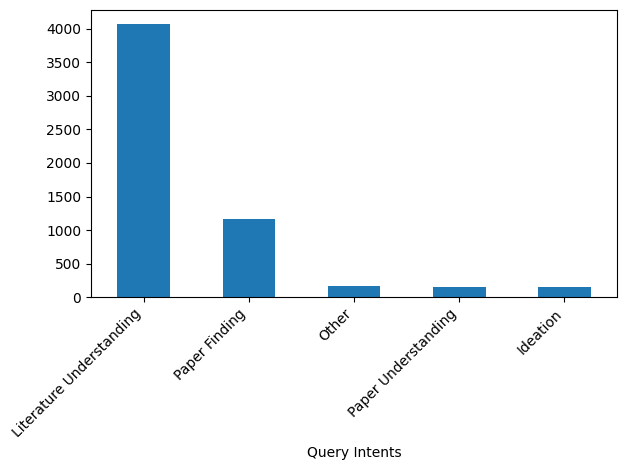

In [9]:
df["Query Intents"].value_counts().plot(kind="bar")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

## In the OpenScholar subset of DR-Tulu's SFT dataset, here's the distribution of Query Intents

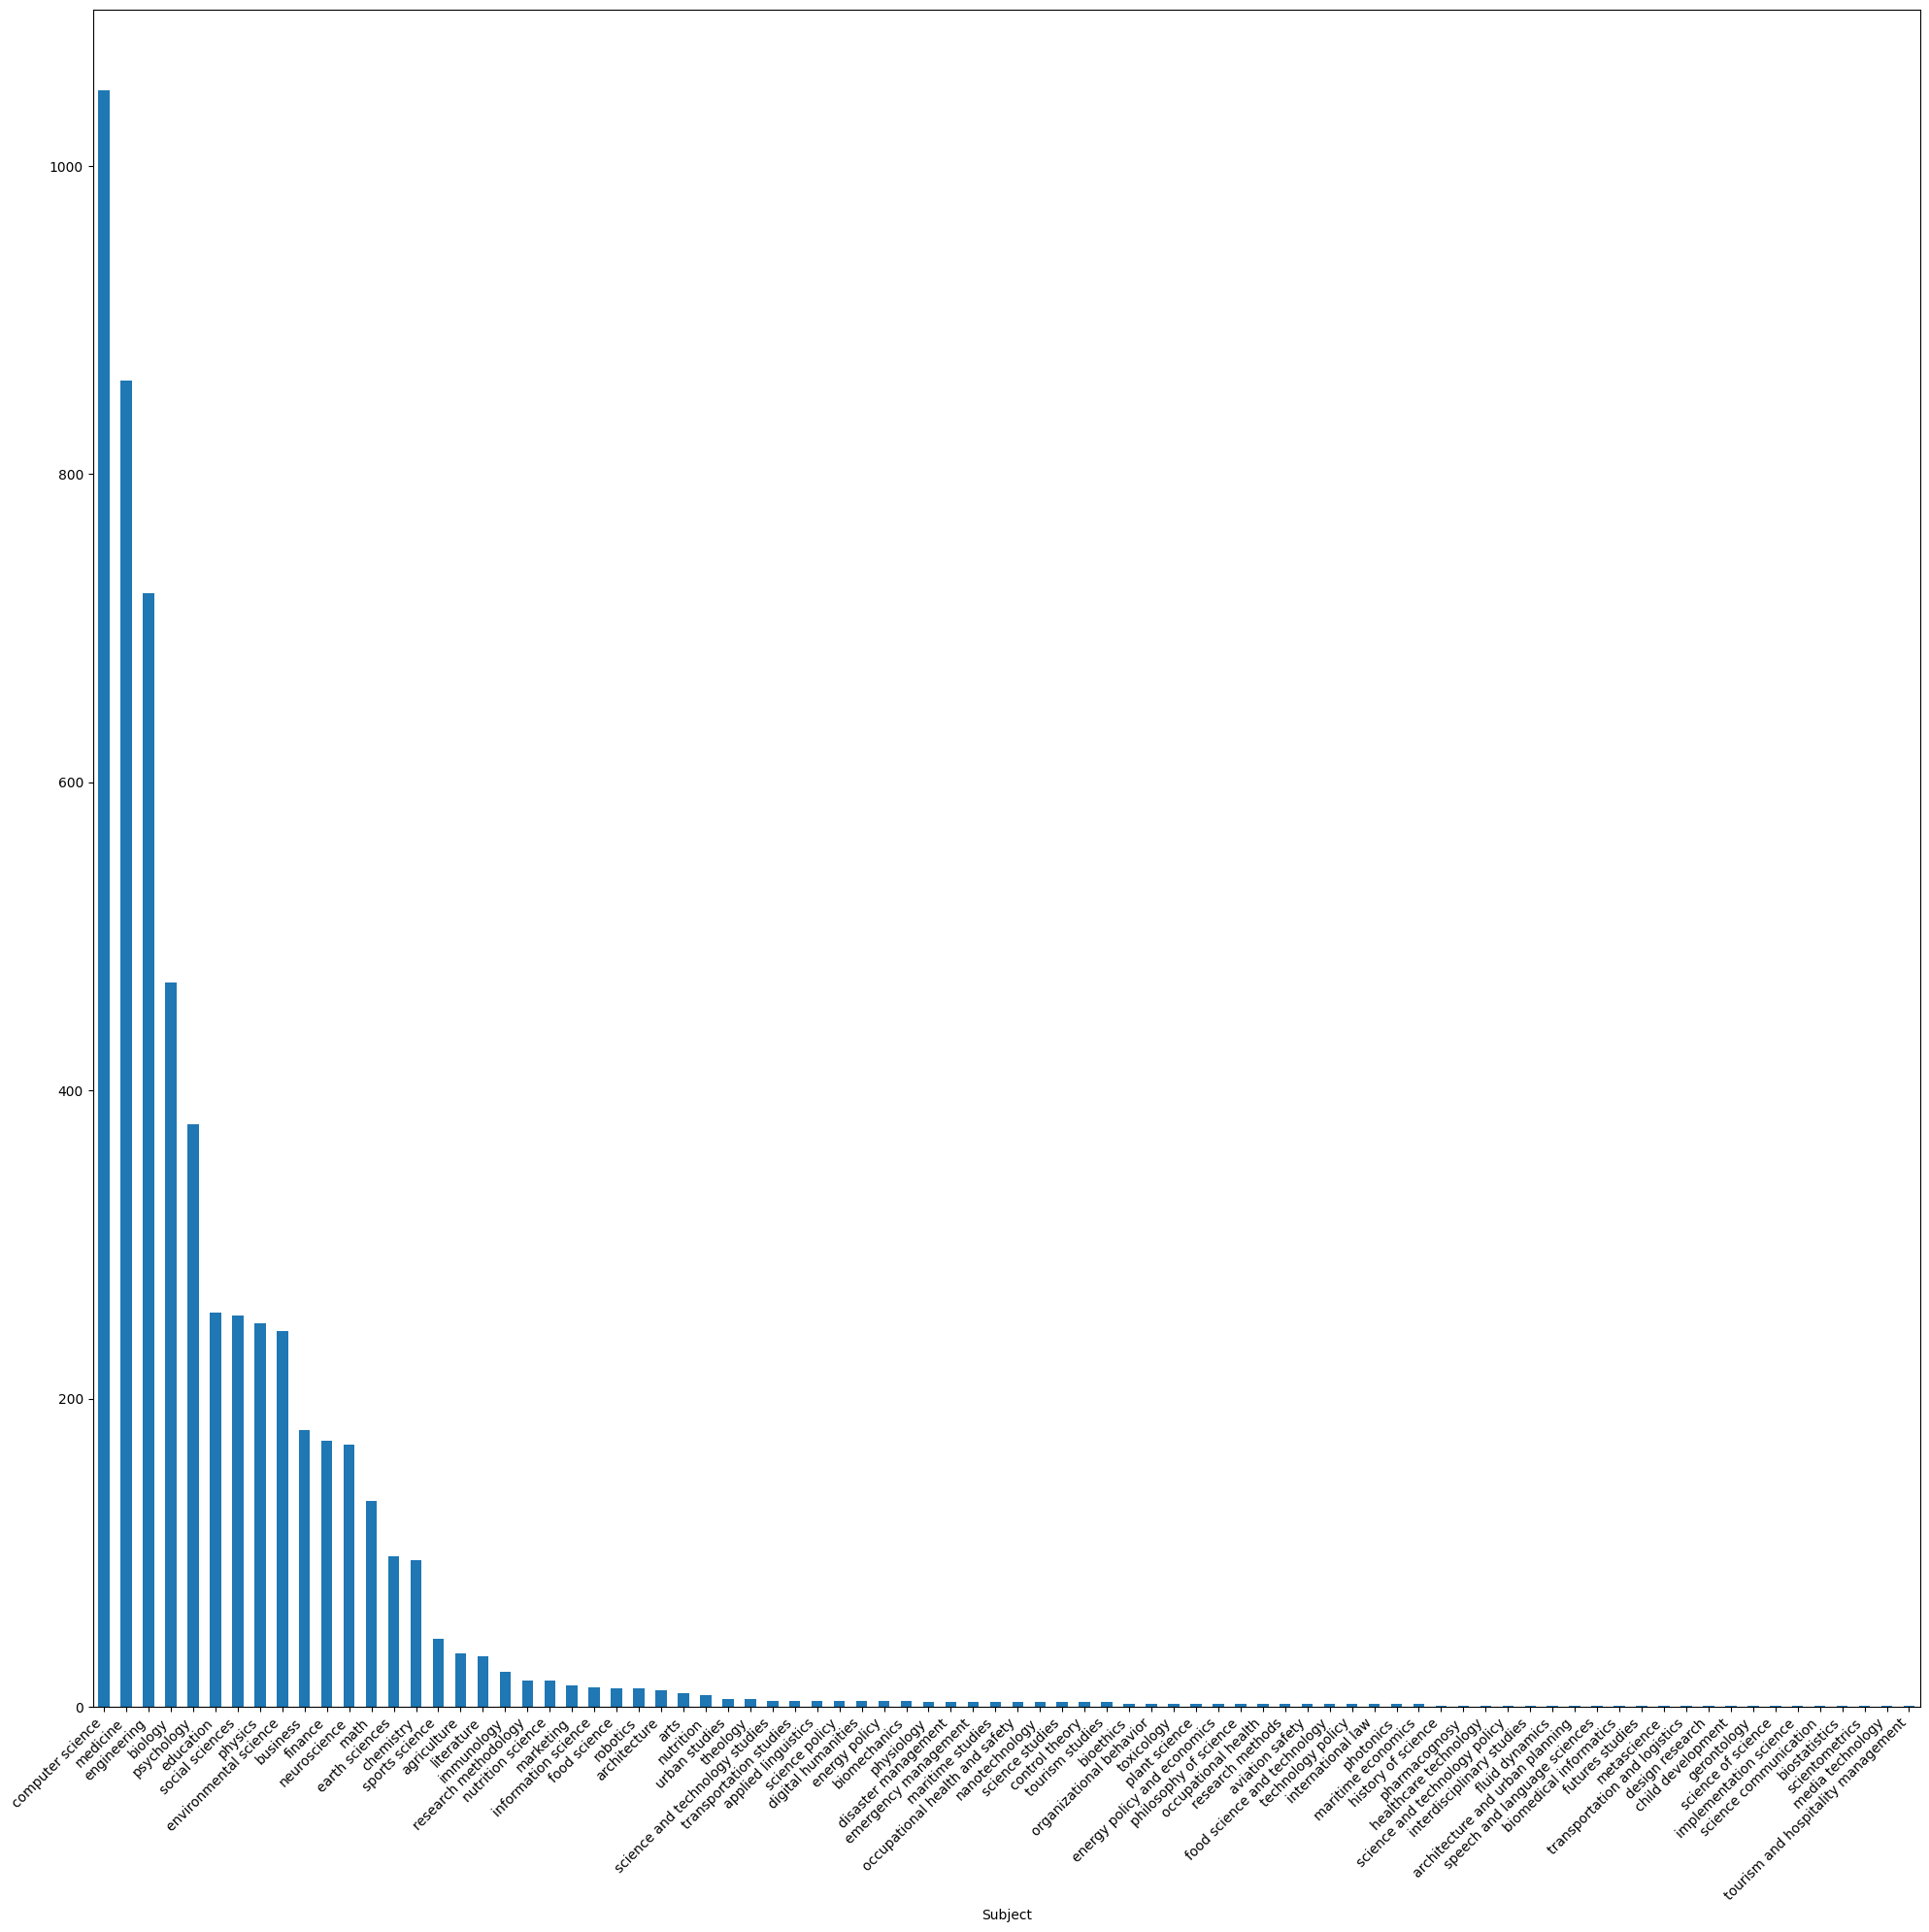

In [10]:
df["Subject"].value_counts().plot(kind="bar", figsize=(20, 20))
plt.xticks(rotation=45, ha="right")
plt.tight_layout()